In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
digits=load_digits()

In [3]:
print("images data shape", digits.data.shape)
print("label data shape",digits.target.shape)

images data shape (1797, 64)
label data shape (1797,)


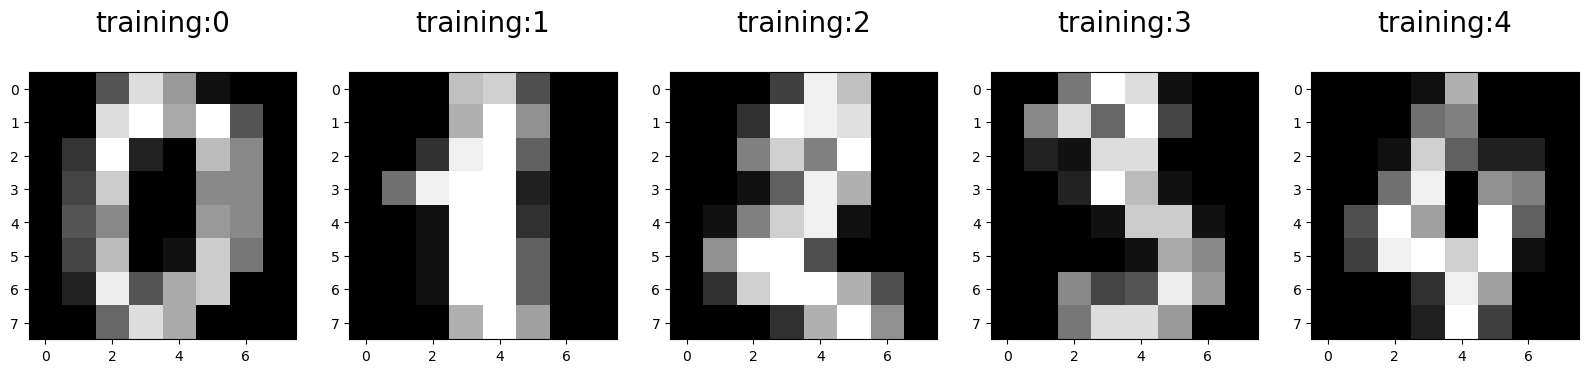

In [4]:
#displaying some images we have
plt.figure(figsize=(20,4))
for index,(image,label) in enumerate(zip(digits.data[:5],digits.target[:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title('training:%i\n' %label,fontsize=20)

In [5]:
#dividing dataset into training and test set
x_train,x_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.23,random_state=2)


In [6]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(1383, 64) (1383,) (414, 64) (414,)


In [7]:
#importing logistic regression model 
from sklearn.linear_model import LogisticRegression


In [8]:
#initialising the instance of model and training
model=LogisticRegression()
model.fit(x_train,y_train)


C:\Users\chipp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
model.predict(x_test[0].reshape(1,-1))

array([4])

In [10]:
predicted=model.predict(x_test)

In [11]:
#finding accuracy of model
score=model.score(x_test,y_test)
print(score)

0.9516908212560387


In [12]:
cm=metrics.confusion_matrix(y_test,predicted)

Text(0.5, 1.0, 'accuracy score:0.9516908212560387')

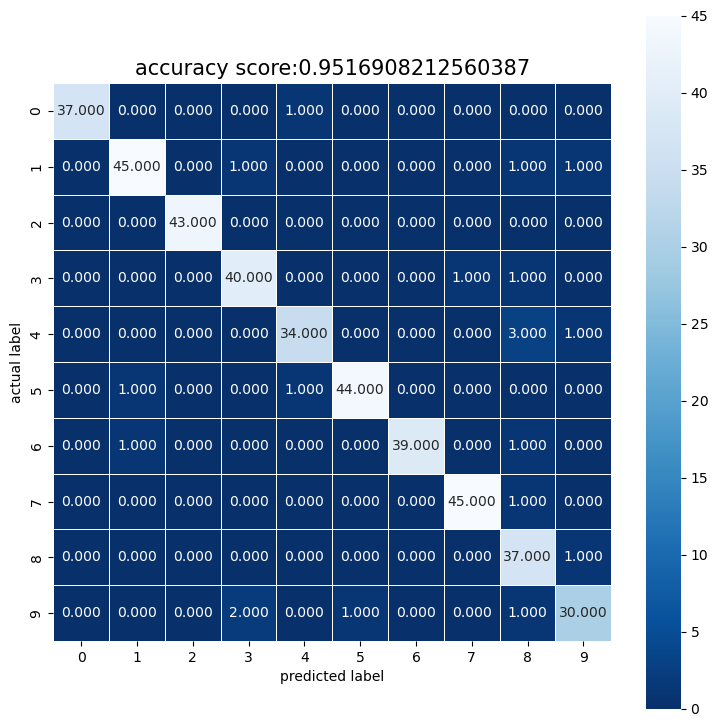

In [13]:
#confusion matrix in a heat map
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt=".3f",linewidths=.5,square=True,cmap="Blues_r")
plt.ylabel("actual label")
plt.xlabel("predicted label")
sample_title='accuracy score:{0}'.format(score)
plt.title(sample_title,size=15)

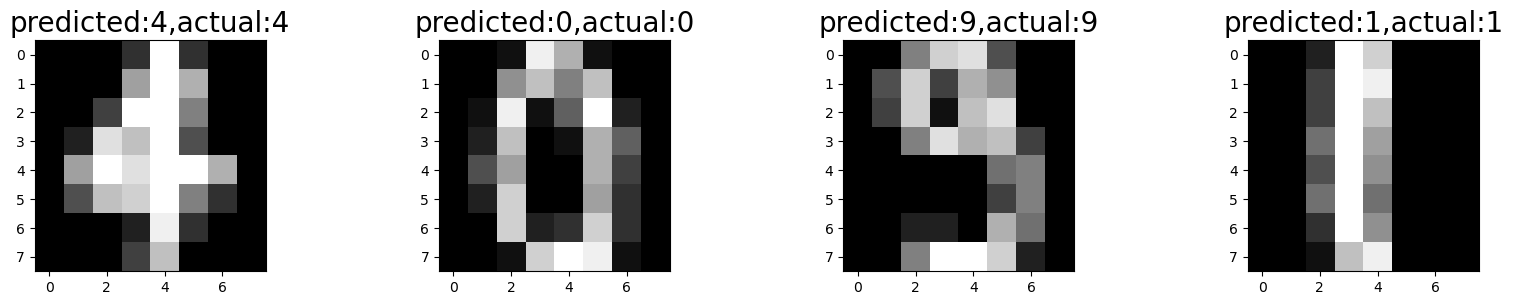

In [14]:
index=0
classifiedindex=[]
for predict,actual in zip(predicted,y_test):
    if predict==actual:
        classifiedindex.append(index)
    index+=1
plt.figure(figsize=(20,3))
for plotindex,wrong in enumerate(classifiedindex[:4]):
    plt.subplot(1,4,plotindex+1)
    plt.imshow(np.reshape(x_test[wrong],(8,8)),cmap=plt.cm.gray)
    plt.title("predicted:{},actual:{}".format(predicted[wrong],y_test[wrong]),fontsize=20)